In [8]:
import pandas as pd
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /home/pyro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data = pd.read_csv("./data/movies.csv")
data.head()


,review,SentimentValue
0,"Faces are slashed, throats are cut, blood squi...",Positive
1,Reasonably effective horror/science-fiction a ...,Negative
2,The villian in this movie is one mean sob and ...,Negative
3,This was one of the few shows that my wife and...,Negative
4,"Sweet, rich valley girl develops crush on a pu...",Negative


In [10]:
def clean_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if not word in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text


data["cleaned_text"] = data["review"].apply(clean_text)


In [11]:
data["SentimentValue"].value_counts()


Positive    26550
Negative    17014
Name: SentimentValue, dtype: int64

In [12]:
def make_cloud(k):
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color="black",
        stopwords=STOPWORDS,
        min_font_size=10,
    ).generate(" ".join(k))

    # plot the WordCloud image
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # show plot
    plt.show()


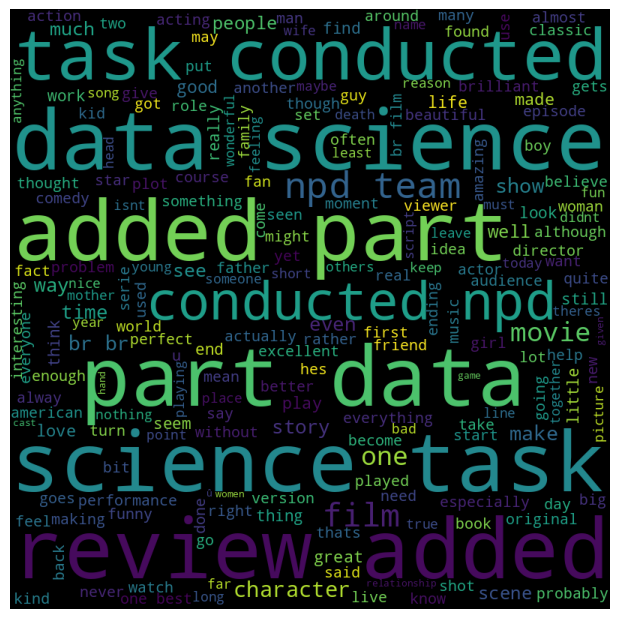

In [13]:
make_cloud(k=data[data["SentimentValue"] == "Negative"]["cleaned_text"])


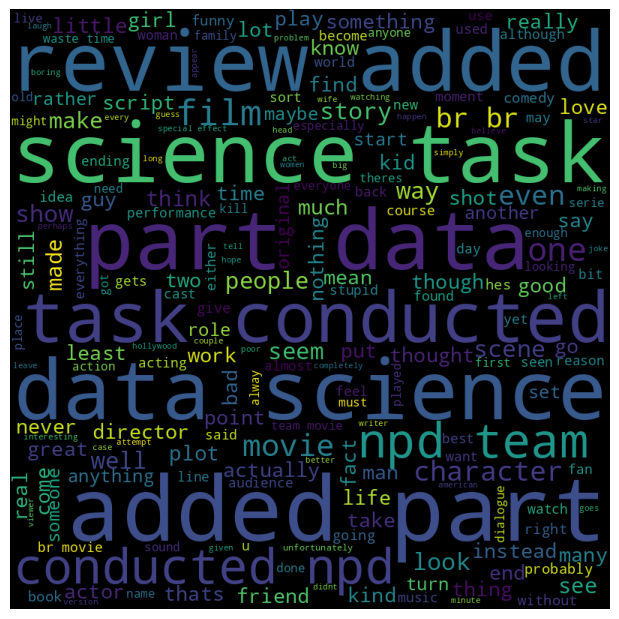

In [14]:
make_cloud(k=data[data["SentimentValue"] == "Positive"]["cleaned_text"])
